<a href="https://colab.research.google.com/github/nancy-kataria/Machine-Learning/blob/main/supervised_learning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset Info
# https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"].unique()
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


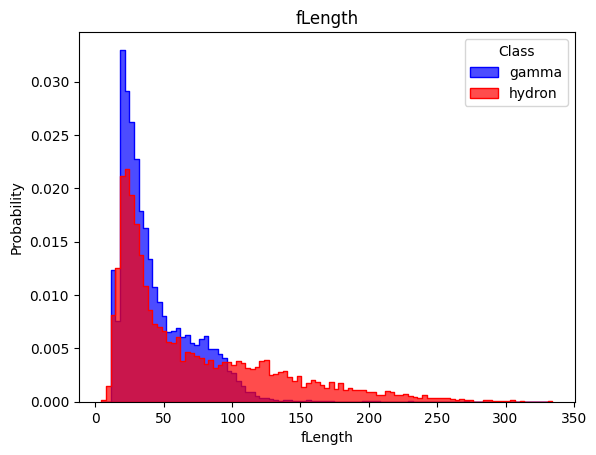

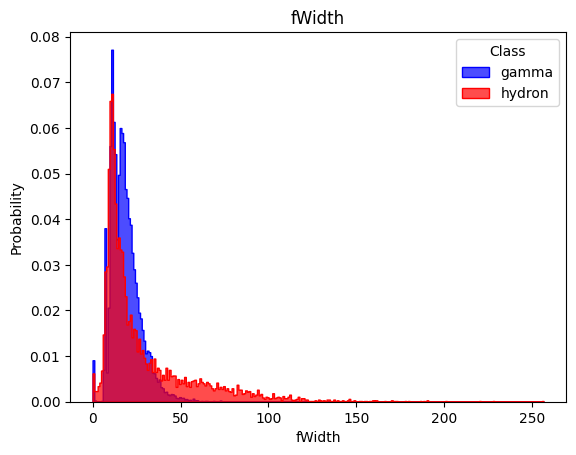

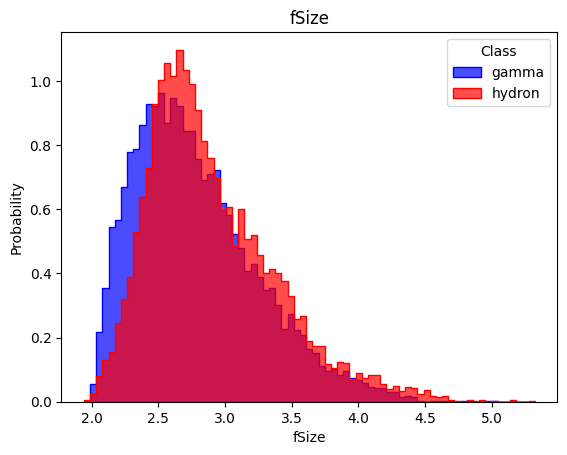

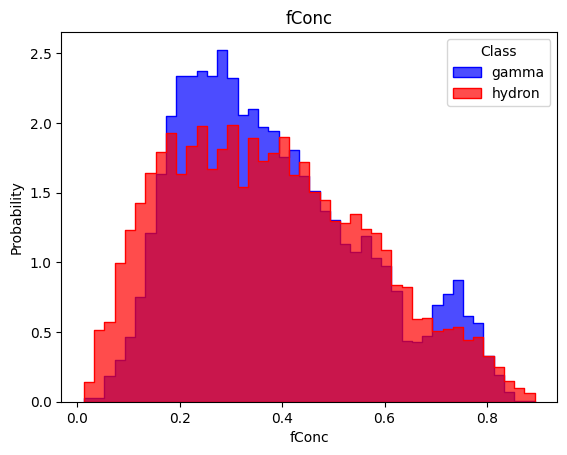

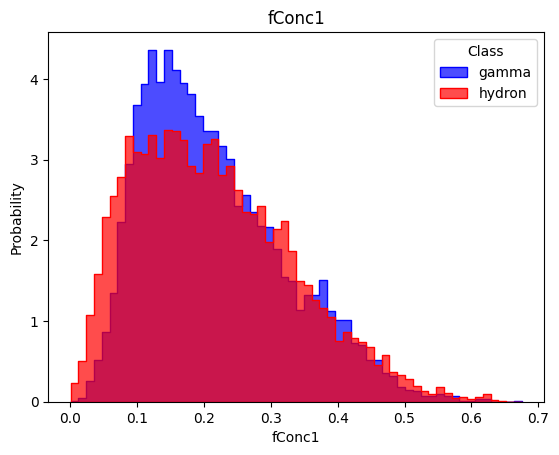

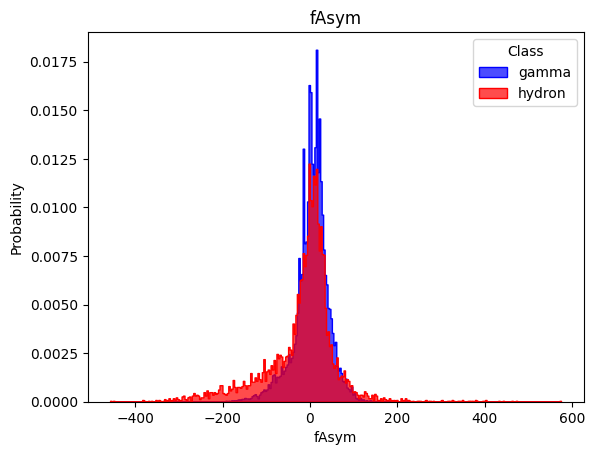

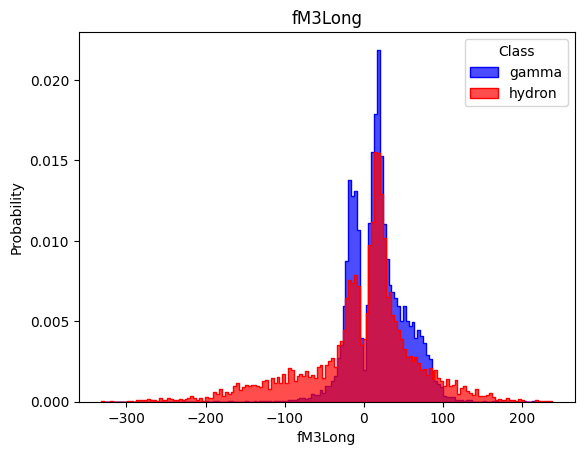

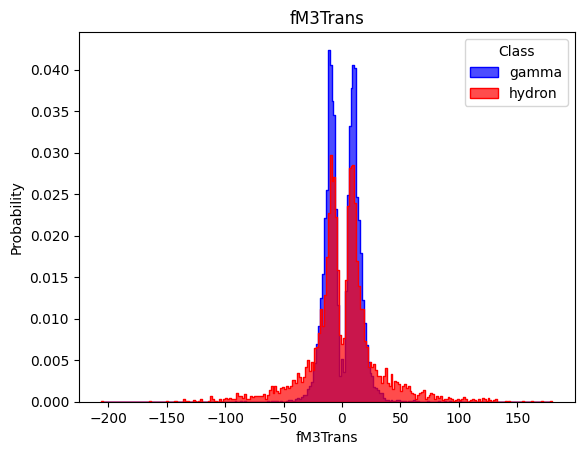

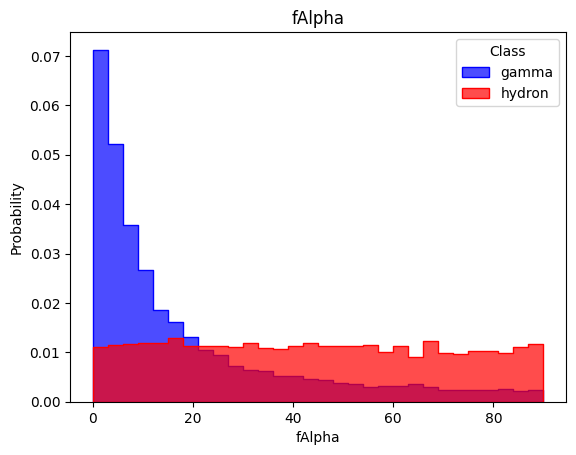

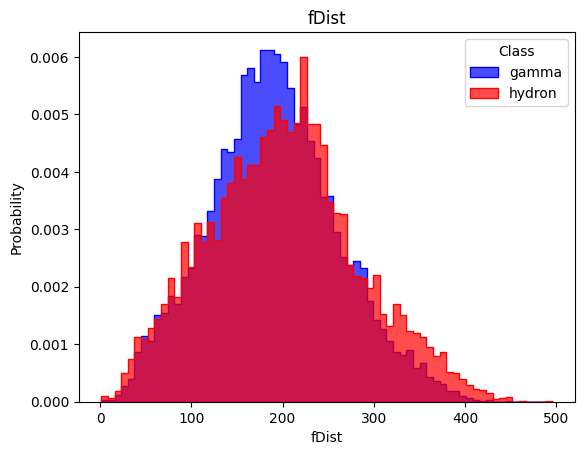

In [5]:
# Visualizing the probability of class = hydron and gamma for every feature

for label in cols[:-1]:
  plt.figure()
  sns.histplot(data=df, x=label, hue = "class", element = "step", stat ="density", common_norm = False, palette = {1:"blue", 0: "red"}, alpha = 0.7)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend(title = "Class", labels = ["gamma", "hydron"])
  plt.show()

In [6]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample = False):
  # [:-1] accessing all columns except the last
  X = dataframe[dataframe.columns[:-1]].values
  # [-1] accesing the last column
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    # increasing the less class data to match with the other class
    X, y = ros.fit_resample(X, y)

  # horizontally stack 2 arrays
  # X is 2 dimensional but y is a vextor of values
  # therefore we reshape y into 2 D array

  # here -1 is len(y)
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [8]:
# check the size of classes
print(len(train[train["class"] == 1])) # gamma
print(len(train[train["class"] == 0])) # hydron

7382
4030


Why is Scaling required?

If one feature has values in the thousands (e.g., income) and another in decimals (e.g., interest rate), the model will give more importance to the larger feature, even if it's not more predictive.

Why is resampling required?

Resampling is used to address class imbalance (when one class dominates the dataset, e.g., 90% "no" and 10% "yes"). This leads to poor performance on the minority class (which is often more important — e.g., fraud, disease detection).

We oversampled here - duplicate/add more samples of the minority class

In [9]:
# scaling and resampling training data
train, X_train, y_train = scale_dataset(train, oversample = True)
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

14764
7382
7382


In [10]:
# validation and test data is unseen, we do not balance or sample this data.
# this is for the purpose of seeing how our model performs
validation, X_validation, y_validation = scale_dataset(validation, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

K - Nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_prediction = knn_model.predict(X_test)

In [14]:
y_prediction

array([1, 1, 1, ..., 1, 0, 1])

In [15]:
y_test

array([1, 1, 1, ..., 1, 1, 0])

In [16]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1350
           1       0.85      0.86      0.86      2454

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [19]:
y_pred = nb_model.predict(X_test)

In [20]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.40      0.51      1350
           1       0.73      0.90      0.81      2454

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [24]:
lg_y_pred = lg_model.predict(X_test)

In [25]:
lg_y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [26]:
print(classification_report(y_test, lg_y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1350
           1       0.85      0.82      0.83      2454

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804

